In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Models 
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math_score'],axis=1)

In [6]:
y=df['math_score']

In [11]:
num_feature=X.select_dtypes(exclude="object").columns
cat_feature=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [15]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [18]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    score=r2_score(true,predicted)
    return mae,score

In [20]:
models={
    "Liner Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbour Regeressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regeressor":RandomForestRegressor(),
    "XGBoost":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(),
    "AdaBoosting Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    model_mae, model_r2=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("----------------------------------------------------")
    print("Models performance")
    print("Mean absolute Error: {:.4f}".format(model_mae))
    print("R2_score:  {:.4f}".format(model_r2))
    r2_list.append(model_r2)

    print('='*35)
    print('\n')

Liner Regression
----------------------------------------------------
Models performance
Mean absolute Error: 4.2148
R2_score:  0.8804


Lasso
----------------------------------------------------
Models performance
Mean absolute Error: 5.1579
R2_score:  0.8253


Ridge
----------------------------------------------------
Models performance
Mean absolute Error: 4.2111
R2_score:  0.8806


K-Neighbour Regeressor
----------------------------------------------------
Models performance
Mean absolute Error: 5.6210
R2_score:  0.7838


Decision Tree
----------------------------------------------------
Models performance
Mean absolute Error: 6.2800
R2_score:  0.7359


Random Forest Regeressor
----------------------------------------------------
Models performance
Mean absolute Error: 4.6943
R2_score:  0.8513


XGBoost
----------------------------------------------------
Models performance
Mean absolute Error: 5.0577
R2_score:  0.8278


Learning rate set to 0.039525
0:	learn: 14.5987177	total: 1.3

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', "R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model name,R2_score
2,Ridge,0.880593
0,Liner Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regeressor,0.851293
8,AdaBoosting Regressor,0.850478
6,XGBoost,0.827797
1,Lasso,0.825320
3,K-Neighbour Regeressor,0.783813
4,Decision Tree,0.735882


In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of model is %.2f" %score)

Accuracy of model is 88.04


Text(0, 0.5, 'Precited')

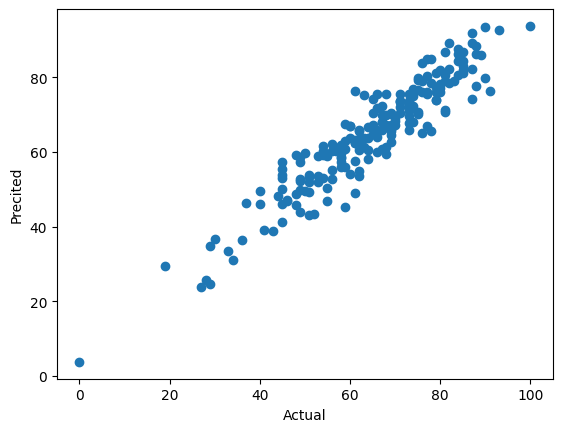

In [26]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Precited")

<Axes: xlabel='math_score'>

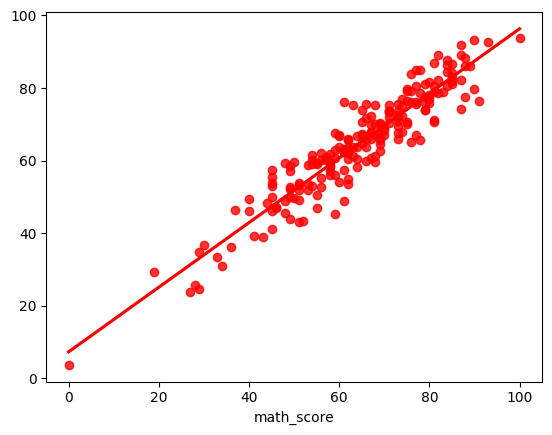

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [29]:
pred_df=pd.DataFrame({'Actual Values':y_test, 'predicted Values':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Values,predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
